# Processing

In [1]:
import processing as pr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import extra_data as ed
import extra_geom as eg
import toolbox_scs.detectors as tbdet

## Dark frame processing

In [3]:
proposal = 2530
run = 49
pattern = ['image', 'dark'] * 99 + ['endimage']
dirname = 'processed_runs_xgm'

In [4]:
pr.reduction_std(proposal=proposal, run=run, pattern=pattern, dirname=dirname,
                 frame_types=None, trains=None, njobs=40)

Submitted 16 slurm jobs to the queue.


## Standard processing

In [5]:
proposal = 2530
run = 50
pattern = ['image', 'dark'] * 99 + ['endimage']
dirname = 'processed_runs_xgm'

In [6]:
pr.reduction_std(proposal=proposal, run=run, pattern=pattern, dirname=dirname,
                 frame_types=None, trains=None, njobs=40)

Submitted 16 slurm jobs to the queue.


## Normalised processing

In [8]:
proposal = 2530
run = 50
pattern = ['image', 'dark'] * 99 + ['endimage']
dark_run = 49
xgm_threshold = (1e-5, np.inf)
dirname = 'processed_runs_xgm'

In [9]:
pr.reduction_norm(proposal=proposal, run=run, pattern=pattern, dirname=dirname,
                  dark_run=dark_run, xgm_threshold=xgm_threshold, njobs=40, trains=None,
                  frames={'image': 'image', 'dark': 'dark'},
                  dark_run_frames={'image': 'image', 'dark': 'dark'})

Submitted 16 slurm jobs to the queue.


# Results

In [10]:
dark_run = 49
run = 50

In [11]:
pulse_images = pr.concat_module_images(dirname='processed_runs_xgm', 
                                       run=run,
                                       run_type='std',
                                       image_type='image_average')

pulse_dark = pr.concat_module_images(dirname='processed_runs_xgm',
                                     run=run,
                                     run_type='std',
                                     image_type='dark_average')

In [12]:
dark_images = pr.concat_module_images(dirname='processed_runs_xgm',
                                      run=dark_run,
                                      run_type='std',
                                      image_type='image_average')

dark_dark = pr.concat_module_images(dirname='processed_runs_xgm',
                                    run=dark_run,
                                    run_type='std',
                                    image_type='dark_average')

In [13]:
image_std = (np.mean(pulse_images, axis=0) - np.mean(pulse_dark, axis=0) -
            (np.mean(dark_images, axis=0) - np.mean(dark_dark, axis=0)))

In [14]:
normalised = pr.concat_module_images(dirname='processed_runs_xgm',
                                     run=run,
                                     run_type='norm',
                                     image_type='image_average')

In [15]:
image_normalised = np.mean(normalised, axis=0)

## Step 3: Plotting the data

From now on, plotting is taken from previous tutorials (`shared/tutorial_analysis.ipynb`). For example:

In [16]:
quad_pos = [(-123.0 , 1.72),  # TR
            (-130.0, -110.18),  # BR
            (1.4, -122.78),  # BL
            (2.2, -4.08)  # TL
            ]

geopath = '/gpfs/exfel/sw/software/git/EXtra-geom/' \
                  'docs/dssc_geo_june19.h5'
geom = eg.DSSC_1MGeometry.from_h5_file_and_quad_positions(geopath, quad_pos)

masklist = [(4, 1, 0),
            (13, 0, 0),
            (1, 0, 6)]

dssc_mask = tbdet.quickmask_DSSC_ASIC(geom, masklist)

#### 3.1 Standard processing

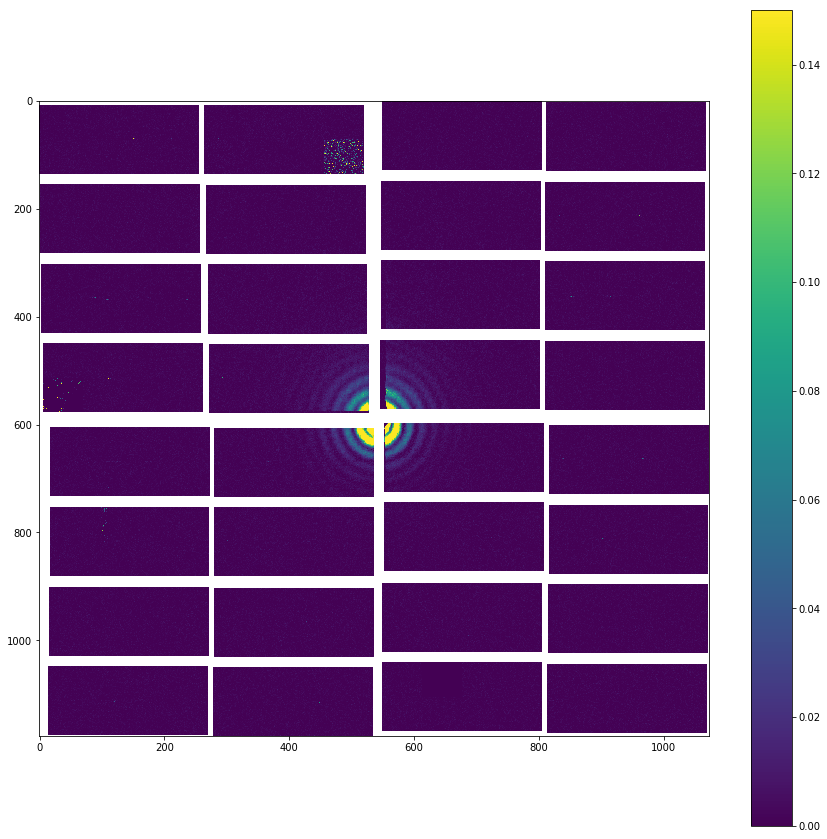

In [17]:
preview_image, center = geom.position_modules_fast(image_std)

fig = plt.figure(figsize=(15, 15))
plt.imshow(preview_image, vmin=0, vmax=0.15, aspect=204.0/236.0)
plt.colorbar()

#### 3.2 Normalised processing

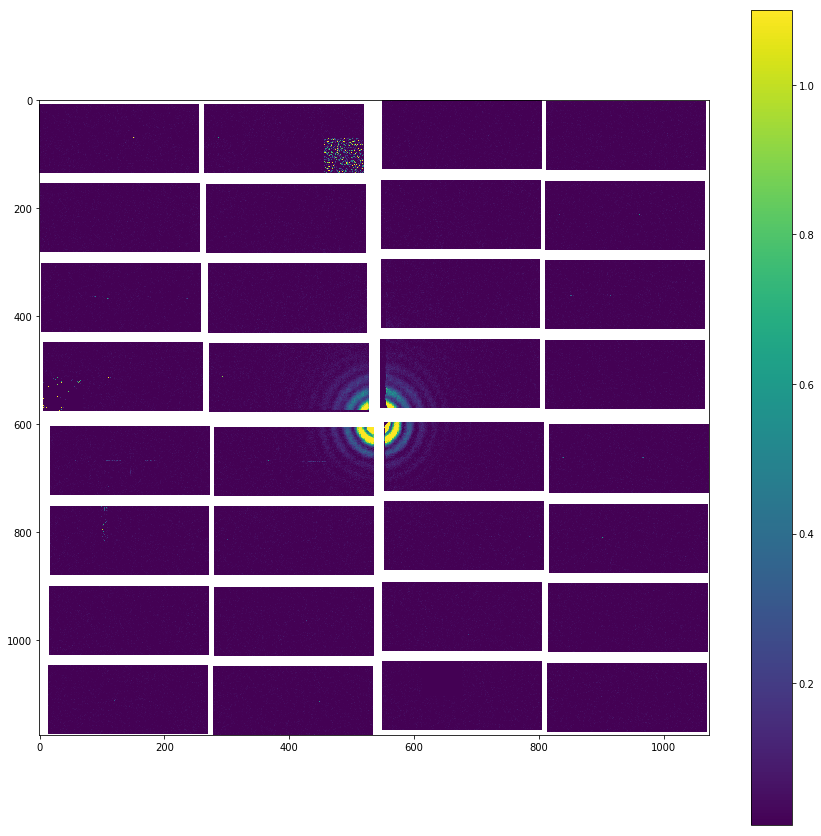

In [18]:
preview_image, center = geom.position_modules_fast(image_normalised)

fig = plt.figure(figsize=(15, 15))
plt.imshow(preview_image, vmin=0.01, vmax=1.1, aspect=204.0/236.0)
plt.colorbar()